In [2]:
import pandas as pd

In [19]:
te = pd.read_csv('tesorter/overlaps/NT1_v2_tes_centromeres.gff', sep="\t", header=None)
te.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,scaffold_1,EDTA,Gypsy_LTR_retrotransposon,18859589,18859844,1022,+,.,ID=TE_homo_11712;Name=TE_00002121_LTR;Classifi...,.,.,-1,-1,.,.,.,.,0
1,scaffold_1,EDTA,LTR_retrotransposon,18859608,18859915,865,-,.,ID=TE_homo_11713;Name=TE_00001322_LTR;Classifi...,.,.,-1,-1,.,.,.,.,0
2,scaffold_1,EDTA,helitron,18859911,18860082,471,-,.,ID=TE_homo_11714;Name=AT3TE64780_ATREP15;Class...,.,.,-1,-1,.,.,.,.,0
3,scaffold_1,EDTA,Gypsy_LTR_retrotransposon,18860264,18860485,431,+,.,ID=TE_homo_11715;Name=AT3TE53870_ATGP5;Classif...,.,.,-1,-1,.,.,.,.,0
4,scaffold_1,EDTA,repeat_region,18860475,18865469,1758,-,.,ID=TE_homo_11716;Name=AT1TE49780_ATREP18;Class...,.,.,-1,-1,.,.,.,.,0


In [4]:
te.shape

(15166, 18)

In [20]:
te = te.drop_duplicates(subset=[0,3,4])

In [9]:
te.iloc[:,2].value_counts()

Gypsy_LTR_retrotransposon       2315
repeat_region                   1613
Copia_LTR_retrotransposon       1123
LTR_retrotransposon             1006
target_site_duplication          981
long_terminal_repeat             980
Mutator_TIR_transposon            98
CACTA_TIR_transposon              16
helitron                          15
SINE_element                       2
L1_LINE_retrotransposon            2
PIF_Harbinger_TIR_transposon       1
Name: 2, dtype: int64

In [21]:
te = te.rename(columns={2: 'edta', 16: 'tesorter'})

In [26]:
te = te[((te.tesorter.str.contains("Ty3")) & (te.edta.str.contains("Gypsy") == 0)) == 0]

In [27]:
te = te[((te.tesorter.str.contains("Ty1")) & (te.edta.str.contains("Copia") == 0)) == 0]

In [29]:
te.edta.value_counts()

Gypsy_LTR_retrotransposon       2311
repeat_region                   1191
Copia_LTR_retrotransposon       1120
LTR_retrotransposon              991
target_site_duplication          949
long_terminal_repeat             948
Mutator_TIR_transposon            98
CACTA_TIR_transposon              16
helitron                          15
SINE_element                       2
L1_LINE_retrotransposon            2
PIF_Harbinger_TIR_transposon       1
Name: edta, dtype: int64

In [2]:
pivo = pd.read_csv('pivot_tes_all.tsv', sep='\t')
pivo

,al1_centr,TE,al1_nocentr,WS1_nocentr,WS1_centr,TE11_centr,TE11_nocentr,TE4_nocentr,TE4_centr,TE8_centr,...,BOR_centr,BOR_nocentr,BAM12_nocentr,BAM12_centr,AL27_centr,AL27_nocentr,AL08_nocentr,AL08_centr,NT1_centr,NT1_nocentr
0,1199.0,Gypsy_LTR_retrotransposon,11228.0,10098.0,1297.0,1815.0,10372.0,10379.0,1983.0,1661.0,...,992.0,6923.0,10091.0,1163.0,845.0,7726.0,7189.0,680.0,2311.0,11905.0
1,617.0,repeat_region,24269.0,21807.0,603.0,727.0,28323.0,24726.0,898.0,735.0,...,25398.0,22749.0,21320.0,660.0,1348.0,21337.0,20034.0,610.0,1191.0,19781.0
2,432.0,target_site_duplication,4578.0,4182.0,518.0,623.0,3956.0,3912.0,657.0,610.0,...,521.0,2397.0,3774.0,416.0,457.0,2406.0,2395.0,379.0,949.0,2413.0
3,409.0,LTR_retrotransposon,5024.0,4651.0,522.0,360.0,3877.0,3739.0,463.0,248.0,...,615.0,2399.0,3240.0,176.0,803.0,2678.0,2331.0,616.0,991.0,3702.0
4,352.0,long_terminal_repeat,4546.0,4129.0,401.0,499.0,3892.0,3851.0,561.0,522.0,...,477.0,2376.0,3769.0,314.0,425.0,2373.0,2361.0,330.0,948.0,2369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,Chlamyvir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
57,NaN,Sola1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,TatI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,Penelope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
edta_vc = te.edta.value_counts().to_frame(name='NT1_centr')

In [44]:
edta_vc

,NT1_centr
Gypsy_LTR_retrotransposon,2311
repeat_region,1191
Copia_LTR_retrotransposon,1120
LTR_retrotransposon,991
target_site_duplication,949
long_terminal_repeat,948
Mutator_TIR_transposon,98
CACTA_TIR_transposon,16
helitron,15
SINE_element,2


In [73]:
pivo = edta_vc.merge(pivo, on='TE', how='outer')

In [45]:
edta_vc['TE'] = edta_vc.index

In [54]:
sort_info = te.tesorter[te.tesorter != "."]

In [61]:
sort_info = sort_info.str.split(pat=pat, expand=True)

In [7]:
import re
pat = re.compile(r'[=;]')

In [4]:
pivo = pivo.drop(columns=["Ceb_d_centr", "Ceb_d_nocentr"])

In [68]:
sorter_vc = sort_info.iloc[:,7].value_counts().to_frame(name='NT1_centr')

In [69]:
sorter_vc['TE'] = sorter_vc.index

In [71]:
edta_vc = pd.concat([edta_vc, sorter_vc])

In [10]:
samp='Ceb_d_nocentr'
te = pd.read_csv('tesorter/overlaps/Ceb_d_v2_tes_nocentromeres.gff', sep="\t", header=None)
te = te.drop_duplicates(subset=[0,3,4])
te = te.rename(columns={2: 'edta', 16: 'tesorter'})
te = te[((te.tesorter.str.contains("Ty3")) & (te.edta.str.contains("Gypsy") == 0)) == 0]
te = te[((te.tesorter.str.contains("Ty1")) & (te.edta.str.contains("Copia") == 0)) == 0]
edta_vc = te.edta.value_counts().to_frame(name=samp)
edta_vc['TE'] = edta_vc.index
edta_vc

,Ceb_d_nocentr,TE
helitron,77983,helitron
repeat_region,26558,repeat_region
Mutator_TIR_transposon,19991,Mutator_TIR_transposon
Gypsy_LTR_retrotransposon,19249,Gypsy_LTR_retrotransposon
Copia_LTR_retrotransposon,13816,Copia_LTR_retrotransposon
long_terminal_repeat,5474,long_terminal_repeat
target_site_duplication,5471,target_site_duplication
LTR_retrotransposon,4378,LTR_retrotransposon
PIF_Harbinger_TIR_transposon,4071,PIF_Harbinger_TIR_transposon
L1_LINE_retrotransposon,4028,L1_LINE_retrotransposon


In [11]:
sort_info = te.tesorter[te.tesorter != "."]
sort_info = sort_info.str.split(pat=pat, expand=True)
sorter_vc = sort_info.iloc[:,7].value_counts().to_frame(name=samp)
sorter_vc['TE'] = sorter_vc.index
sorter_vc

,Ceb_d_nocentr,TE
LINE,2517,LINE
Retand,1966,Retand
Ale,1766,Ale
Bianca,1512,Bianca
Athila,1423,Athila
Ivana,620,Ivana
Tekay,569,Tekay
MuDR_Mutator,498,MuDR_Mutator
Tork,442,Tork
CRM,295,CRM


In [12]:
vc = pd.concat([edta_vc, sorter_vc])
pivo = vc.merge(pivo, on='TE', how='outer')
pivo

,Ceb_d_nocentr,TE,Ceb_d_centr,al1_centr,al1_nocentr,WS1_nocentr,WS1_centr,TE11_centr,TE11_nocentr,TE4_nocentr,...,BOR_centr,BOR_nocentr,BAM12_nocentr,BAM12_centr,AL27_centr,AL27_nocentr,AL08_nocentr,AL08_centr,NT1_centr,NT1_nocentr
0,77983.0,helitron,280.0,96.0,72598.0,67999.0,37.0,122.0,69311.0,73833.0,...,153.0,61178.0,73087.0,93.0,89.0,61410.0,59845.0,86.0,15.0,60006.0
1,26558.0,repeat_region,1516.0,617.0,24269.0,21807.0,603.0,727.0,28323.0,24726.0,...,25398.0,22749.0,21320.0,660.0,1348.0,21337.0,20034.0,610.0,1191.0,19781.0
2,19991.0,Mutator_TIR_transposon,87.0,23.0,21136.0,20459.0,35.0,26.0,21152.0,21135.0,...,38.0,18188.0,20414.0,56.0,60.0,17619.0,19126.0,96.0,98.0,17637.0
3,19249.0,Gypsy_LTR_retrotransposon,794.0,1199.0,11228.0,10098.0,1297.0,1815.0,10372.0,10379.0,...,992.0,6923.0,10091.0,1163.0,845.0,7726.0,7189.0,680.0,2311.0,11905.0
4,13816.0,Copia_LTR_retrotransposon,3122.0,322.0,8575.0,6820.0,276.0,218.0,7560.0,7553.0,...,457.0,5468.0,8364.0,323.0,598.0,5470.0,5917.0,427.0,1120.0,6291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,NaN,Osser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
57,NaN,Sola1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,TatI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,Penelope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
edta_vc

,NT1_nocentr,TE,NT1_centr
helitron,60006.0,helitron,NaN
repeat_region,19781.0,repeat_region,NaN
Mutator_TIR_transposon,17637.0,Mutator_TIR_transposon,NaN
Gypsy_LTR_retrotransposon,11905.0,Gypsy_LTR_retrotransposon,NaN
Copia_LTR_retrotransposon,6291.0,Copia_LTR_retrotransposon,NaN
LTR_retrotransposon,3702.0,LTR_retrotransposon,NaN
L1_LINE_retrotransposon,3484.0,L1_LINE_retrotransposon,NaN
PIF_Harbinger_TIR_transposon,3101.0,PIF_Harbinger_TIR_transposon,NaN
CACTA_TIR_transposon,2798.0,CACTA_TIR_transposon,NaN
target_site_duplication,2413.0,target_site_duplication,NaN


In [21]:
pivo.to_csv("pivot_tes_all4tsv", sep="\t", index=False)

In [89]:
pivo = pd.read_csv("pivot_tes_all3.tsv", sep="\t", index_col=0)

In [16]:
cols = pivo.columns.tolist()
cols = cols[1:] + [cols[0]]
cols

['TE',
 'Ceb_d_centr',
 'al1_centr',
 'al1_nocentr',
 'WS1_nocentr',
 'WS1_centr',
 'TE11_centr',
 'TE11_nocentr',
 'TE4_nocentr',
 'TE4_centr',
 'TE8_centr',
 'TE8_nocentr',
 'PU6_nocentr',
 'PU6_centr',
 'NT9_centr',
 'NT9_nocentr',
 'NT8_nocentr',
 'NT8_centr',
 'NT12_centr',
 'NT12_nocentr',
 'MN47_nocentr',
 'MN47_centr',
 'TSS_centr',
 'TSS_nocentr',
 'LPT_nocentr',
 'LPT_centr',
 'PTP_centr',
 'PTP_nocentr',
 'Ped_nocentr',
 'Ped_centr',
 'Ceb_c_nocentr',
 'Ceb_c_centr',
 'BOR_centr',
 'BOR_nocentr',
 'BAM12_nocentr',
 'BAM12_centr',
 'AL27_centr',
 'AL27_nocentr',
 'AL08_nocentr',
 'AL08_centr',
 'NT1_centr',
 'NT1_nocentr',
 'Ceb_d_nocentr']

In [17]:
pivo = pivo[cols]

In [19]:
pivo = pivo.fillna(0)

In [90]:
pivot = pivo.transpose()

In [25]:
pivo

,Ceb_d_centr,al1_centr,al1_nocentr,WS1_nocentr,WS1_centr,TE11_centr,TE11_nocentr,TE4_nocentr,TE4_centr,TE8_centr,...,BOR_nocentr,BAM12_nocentr,BAM12_centr,AL27_centr,AL27_nocentr,AL08_nocentr,AL08_centr,NT1_centr,NT1_nocentr,Ceb_d_nocentr
TE,,,,,,,,,,,,,,,,,,,,,
helitron,280.0,96.0,72598.0,67999.0,37.0,122.0,69311.0,73833.0,259.0,133.0,...,61178.0,73087.0,93.0,89.0,61410.0,59845.0,86.0,15.0,60006.0,77983.0
repeat_region,1516.0,617.0,24269.0,21807.0,603.0,727.0,28323.0,24726.0,898.0,735.0,...,22749.0,21320.0,660.0,1348.0,21337.0,20034.0,610.0,1191.0,19781.0,26558.0
Mutator_TIR_transposon,87.0,23.0,21136.0,20459.0,35.0,26.0,21152.0,21135.0,63.0,44.0,...,18188.0,20414.0,56.0,60.0,17619.0,19126.0,96.0,98.0,17637.0,19991.0
Gypsy_LTR_retrotransposon,794.0,1199.0,11228.0,10098.0,1297.0,1815.0,10372.0,10379.0,1983.0,1661.0,...,6923.0,10091.0,1163.0,845.0,7726.0,7189.0,680.0,2311.0,11905.0,19249.0
Copia_LTR_retrotransposon,3122.0,322.0,8575.0,6820.0,276.0,218.0,7560.0,7553.0,341.0,286.0,...,5468.0,8364.0,323.0,598.0,5470.0,5917.0,427.0,1120.0,6291.0,13816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Osser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Sola1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TatI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
pivot_centr = pivot.iloc[[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,30,31,34,35,38,39],:]

In [40]:
pivot_centr 

TE,helitron,repeat_region,Mutator_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,long_terminal_repeat,target_site_duplication,LTR_retrotransposon,PIF_Harbinger_TIR_transposon,L1_LINE_retrotransposon,...,Phygy,non-chromo-outgroup,non_LTR_retrotransposon,Gymco-I,Sola2,Osser,Sola1,TatI,Penelope,Bryco
Ceb_d_centr,280.0,1516.0,87.0,794.0,3122.0,688.0,690.0,1705.0,15.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
al1_centr,96.0,617.0,23.0,1199.0,322.0,352.0,432.0,409.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WS1_centr,37.0,603.0,35.0,1297.0,276.0,401.0,518.0,522.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TE11_centr,122.0,727.0,26.0,1815.0,218.0,499.0,623.0,360.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TE4_centr,259.0,898.0,63.0,1983.0,341.0,561.0,657.0,463.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TE8_centr,133.0,735.0,44.0,1661.0,286.0,522.0,610.0,248.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PU6_centr,147.0,3939.0,23.0,1485.0,337.0,443.0,541.0,551.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NT9_centr,143.0,760.0,57.0,1625.0,364.0,539.0,598.0,768.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NT8_centr,204.0,867.0,49.0,1644.0,341.0,583.0,617.0,546.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NT12_centr,165.0,852.0,26.0,1644.0,451.0,589.0,696.0,631.0,2.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
pivot["summa"] = pivot.sum(axis=1)

<AxesSubplot: >

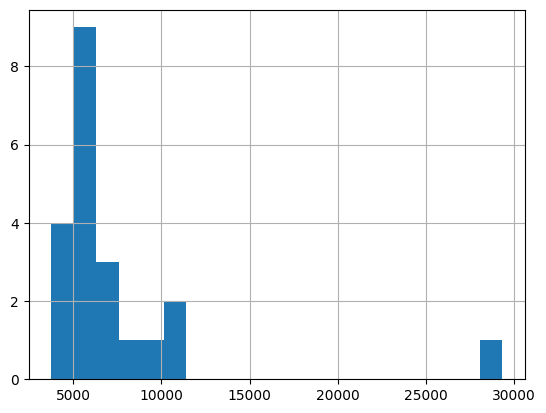

In [44]:
pivot_centr.summa.hist(bins=20)

In [46]:
pivot_centr[pivot_centr.summa > 10000]

TE,helitron,repeat_region,Mutator_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,long_terminal_repeat,target_site_duplication,LTR_retrotransposon,PIF_Harbinger_TIR_transposon,L1_LINE_retrotransposon,...,non-chromo-outgroup,non_LTR_retrotransposon,Gymco-I,Sola2,Osser,Sola1,TatI,Penelope,Bryco,summa
Ceb_d_centr,280.0,1516.0,87.0,794.0,3122.0,688.0,690.0,1705.0,15.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10249.0
Ceb_c_centr,445.0,2075.0,529.0,1222.0,2571.0,644.0,661.0,1399.0,27.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11185.0
BOR_centr,153.0,25398.0,38.0,992.0,457.0,477.0,521.0,615.0,12.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29312.0


In [47]:
pivot_centr.columns

Index(['helitron', 'repeat_region', 'Mutator_TIR_transposon',
       'Gypsy_LTR_retrotransposon', 'Copia_LTR_retrotransposon',
       'long_terminal_repeat', 'target_site_duplication',
       'LTR_retrotransposon', 'PIF_Harbinger_TIR_transposon',
       'L1_LINE_retrotransposon', 'CACTA_TIR_transposon', 'hAT_TIR_transposon',
       'Tc1_Mariner_TIR_transposon', 'SINE_element', 'LINE_element', 'LINE',
       'Retand', 'Ale', 'Bianca', 'Athila', 'Ivana', 'Tekay', 'MuDR_Mutator',
       'Tork', 'CRM', 'PIF_Harbinger', 'EnSpm_CACTA', 'SIRE', 'hAT', 'Ikeros',
       'Reina', 'Helitron', 'TAR', 'Tc1_Mariner', 'pararetrovirus', 'Angela',
       'Alesia', 'Ty1-outgroup', 'Gymco-II', 'Chlamyvir', 'chromo-outgroup',
       'Merlin', 'TatIII', 'chromo-unclass', 'Galadriel', 'Gymco-III',
       'polinton', 'DIRS', 'Lyco', 'Tcn1', 'Ogre', 'Phygy',
       'non-chromo-outgroup', 'non_LTR_retrotransposon', 'Gymco-I', 'Sola2',
       'Osser', 'Sola1', 'TatI', 'Penelope', 'Bryco', 'summa'],
      dtype=

In [53]:
pivot_centr["sum_LTR"] = pivot_centr.Gypsy_LTR_retrotransposon + pivot_centr.Copia_LTR_retrotransposon + pivot_centr.LTR_retrotransposon + pivot_centr.Retand + pivot_centr.Ale + pivot_centr.Bianca + pivot_centr.Athila + pivot_centr.Ivana + pivot_centr.Tekay  + pivot_centr.Tork + pivot_centr.CRM + pivot_centr.Ikeros + pivot_centr.Reina + pivot_centr.Angela  + pivot_centr.Alesia  + pivot_centr['Ty1-outgroup'] + pivot_centr['Gymco-II'] + pivot_centr.Chlamyvir + pivot_centr["chromo-outgroup"] + pivot_centr.TatIII  + pivot_centr["chromo-unclass"]  + pivot_centr.Galadriel + pivot_centr["Gymco-III"]  + pivot_centr.Lyco  + pivot_centr.Tcn1  + pivot_centr.Ogre + pivot_centr.Phygy  + pivot_centr["non-chromo-outgroup"] + pivot_centr["Gymco-I"] + pivot_centr.TatI  + pivot_centr.Osser  + pivot_centr.Bryco


/tmp/ipykernel_93274/1900022343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_centr["sum_LTR"] = pivot_centr.Gypsy_LTR_retrotransposon + pivot_centr.Copia_LTR_retrotransposon + pivot_centr.LTR_retrotransposon + pivot_centr.Retand + pivot_centr.Ale + pivot_centr.Bianca + pivot_centr.Athila + pivot_centr.Ivana + pivot_centr.Tekay  + pivot_centr.Tork + pivot_centr.CRM + pivot_centr.Ikeros + pivot_centr.Reina + pivot_centr.Angela  + pivot_centr.Alesia  + pivot_centr['Ty1-outgroup'] + pivot_centr['Gymco-II'] + pivot_centr.Chlamyvir + pivot_centr["chromo-outgroup"] + pivot_centr.TatIII  + pivot_centr["chromo-unclass"]  + pivot_centr.Galadriel + pivot_centr["Gymco-III"]  + pivot_centr.Lyco  + pivot_centr.Tcn1  + pivot_centr.Ogre + pivot_cent

<AxesSubplot: >

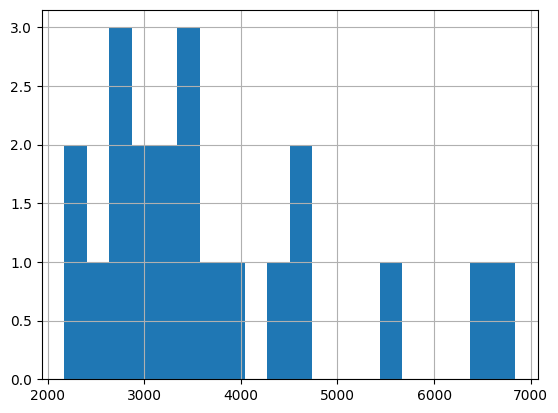

In [57]:
pivot_centr.sum_LTR.hist(bins=20)

In [58]:
pivot_centr[pivot_centr.sum_LTR > 4000]

TE,helitron,repeat_region,Mutator_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,long_terminal_repeat,target_site_duplication,LTR_retrotransposon,PIF_Harbinger_TIR_transposon,L1_LINE_retrotransposon,...,non_LTR_retrotransposon,Gymco-I,Sola2,Osser,Sola1,TatI,Penelope,Bryco,summa,sum_LTR
Ceb_d_centr,280.0,1516.0,87.0,794.0,3122.0,688.0,690.0,1705.0,15.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10249.0,6839.0
MN47_centr,50.0,987.0,13.0,1568.0,1043.0,697.0,790.0,784.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7041.0,4468.0
TSS_centr,96.0,910.0,7.0,1492.0,1368.0,557.0,576.0,751.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6899.0,4688.0
Ped_centr,309.0,1213.0,86.0,689.0,1621.0,458.0,475.0,1361.0,16.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7303.0,4619.0
Ceb_c_centr,445.0,2075.0,529.0,1222.0,2571.0,644.0,661.0,1399.0,27.0,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11185.0,6589.0
NT1_centr,15.0,1191.0,98.0,2311.0,1120.0,948.0,949.0,991.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8863.0,5635.0


In [59]:
pivot_centr["sum_Ty1"] = pivot_centr.Copia_LTR_retrotransposon + pivot_centr.Ale + pivot_centr.Bianca + pivot_centr.Ivana + pivot_centr.Tork + pivot_centr.Ikeros + pivot_centr.Angela  + pivot_centr.Alesia  + pivot_centr['Ty1-outgroup'] + pivot_centr['Gymco-II'] +  pivot_centr["Gymco-III"]  + pivot_centr.Lyco + pivot_centr["Gymco-I"] + pivot_centr.Osser  + pivot_centr.Bryco
pivot_centr["sum_Ty3"] = pivot_centr.Gypsy_LTR_retrotransposon + pivot_centr.Retand + pivot_centr.Athila + pivot_centr.Tekay + pivot_centr.CRM + pivot_centr.Reina + pivot_centr.Chlamyvir + pivot_centr["chromo-outgroup"] + pivot_centr.TatIII  + pivot_centr["chromo-unclass"]  + pivot_centr.Galadriel  + pivot_centr.Tcn1  + pivot_centr.Ogre + pivot_centr.Phygy  + pivot_centr["non-chromo-outgroup"] + pivot_centr.TatI


/tmp/ipykernel_93274/1088549667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_centr["sum_Ty1"] = pivot_centr.Copia_LTR_retrotransposon + pivot_centr.Ale + pivot_centr.Bianca + pivot_centr.Ivana + pivot_centr.Tork + pivot_centr.Ikeros + pivot_centr.Angela  + pivot_centr.Alesia  + pivot_centr['Ty1-outgroup'] + pivot_centr['Gymco-II'] +  pivot_centr["Gymco-III"]  + pivot_centr.Lyco + pivot_centr["Gymco-I"] + pivot_centr.Osser  + pivot_centr.Bryco
/tmp/ipykernel_93274/1088549667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

array([[<AxesSubplot: title={'center': 'sum_Ty1'}>,
        <AxesSubplot: title={'center': 'sum_Ty3'}>]], dtype=object)

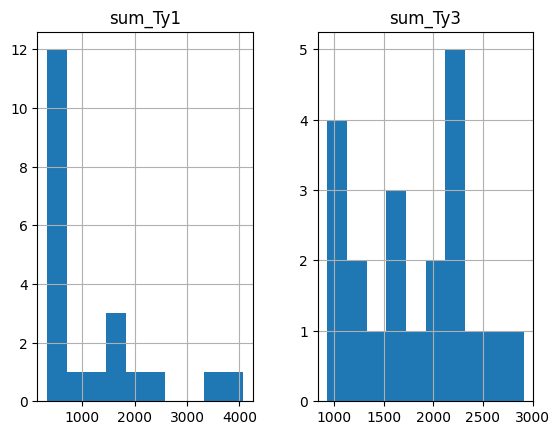

In [61]:
pivot_centr.loc[:,["sum_Ty1", "sum_Ty3"]].hist()

<AxesSubplot: >

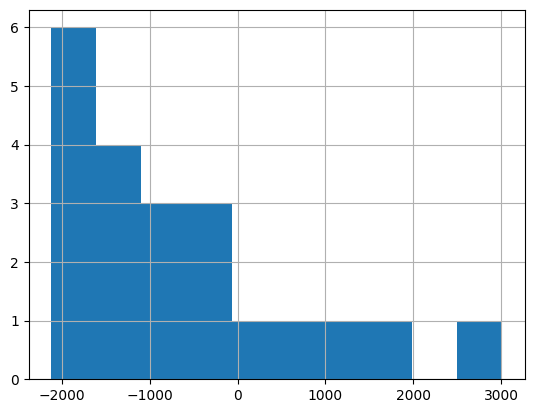

In [63]:
(pivot_centr.sum_Ty1 - pivot_centr.sum_Ty3).hist()

<AxesSubplot: >

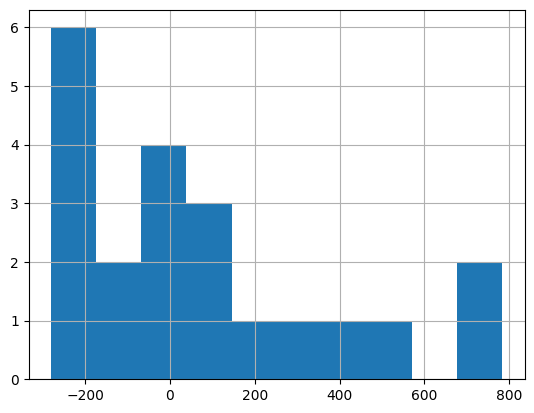

In [64]:
(pivot_centr.Ale - pivot_centr.Athila).hist()

In [65]:
pivot_centr.to_csv("pivot_centr_only.tsv", sep="\t")

In [71]:
pivot_centr[(pivot_centr.Ale - pivot_centr.Athila) < 0]

TE,helitron,repeat_region,Mutator_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,long_terminal_repeat,target_site_duplication,LTR_retrotransposon,PIF_Harbinger_TIR_transposon,L1_LINE_retrotransposon,...,Sola2,Osser,Sola1,TatI,Penelope,Bryco,summa,sum_LTR,sum_Ty1,sum_Ty3
al1_centr,96.0,617.0,23.0,1199.0,322.0,352.0,432.0,409.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4085.0,2494.0,474.0,1611.0
WS1_centr,37.0,603.0,35.0,1297.0,276.0,401.0,518.0,522.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4358.0,2710.0,404.0,1784.0
TE11_centr,122.0,727.0,26.0,1815.0,218.0,499.0,623.0,360.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5165.0,3107.0,327.0,2420.0
TE4_centr,259.0,898.0,63.0,1983.0,341.0,561.0,657.0,463.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6224.0,3576.0,494.0,2619.0
TE8_centr,133.0,735.0,44.0,1661.0,286.0,522.0,610.0,248.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5028.0,2925.0,420.0,2257.0
PU6_centr,147.0,3939.0,23.0,1485.0,337.0,443.0,541.0,551.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8142.0,2992.0,493.0,1948.0
NT9_centr,143.0,760.0,57.0,1625.0,364.0,539.0,598.0,768.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5655.0,3454.0,525.0,2161.0
NT8_centr,204.0,867.0,49.0,1644.0,341.0,583.0,617.0,546.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5584.0,3183.0,492.0,2145.0
NT12_centr,165.0,852.0,26.0,1644.0,451.0,589.0,696.0,631.0,2.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5993.0,3532.0,628.0,2273.0
BOR_centr,153.0,25398.0,38.0,992.0,457.0,477.0,521.0,615.0,12.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29312.0,2639.0,681.0,1343.0


In [72]:
(pivot_centr.Ale - pivot_centr.Athila)

Ceb_d_centr    783.0
al1_centr      -45.0
WS1_centr     -142.0
TE11_centr    -253.0
TE4_centr     -265.0
TE8_centr     -280.0
PU6_centr     -145.0
NT9_centr     -175.0
NT8_centr     -256.0
NT12_centr    -215.0
MN47_centr     140.0
TSS_centr      242.0
LPT_centr      308.0
PTP_centr      373.0
Ped_centr      556.0
Ceb_c_centr    721.0
BOR_centr      -24.0
BAM12_centr    -48.0
AL27_centr      26.0
AL08_centr      56.0
NT1_centr      141.0
dtype: float64

<AxesSubplot: >

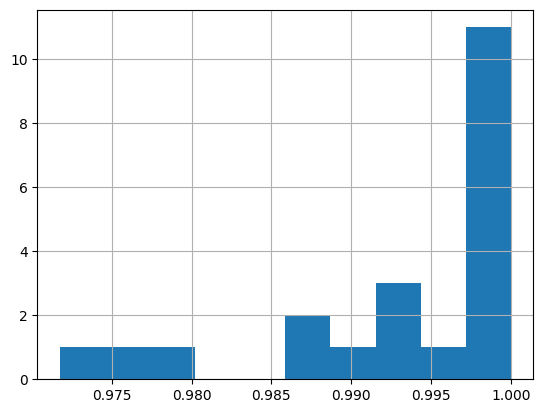

In [75]:
(pivot_centr.Ale / (pivot_centr.sum_Ty1 - pivot_centr.Copia_LTR_retrotransposon)).hist()

<AxesSubplot: >

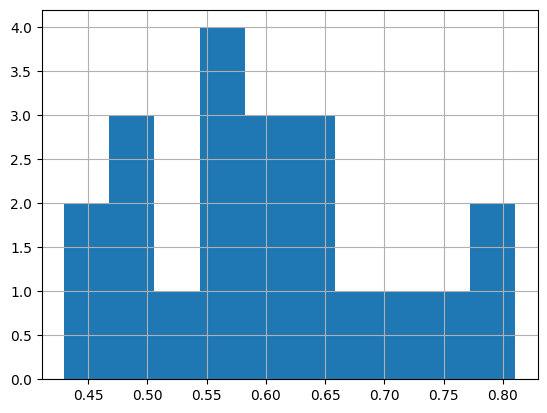

In [76]:
(pivot_centr.Athila / (pivot_centr.sum_Ty3 - pivot_centr.Gypsy_LTR_retrotransposon)).hist()

<AxesSubplot: >

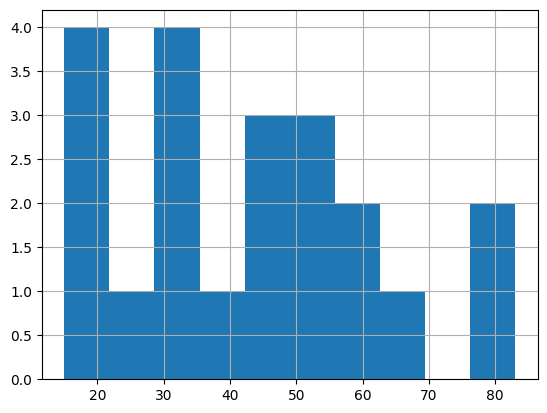

In [77]:
pivot_centr.Retand.hist()

<AxesSubplot: >

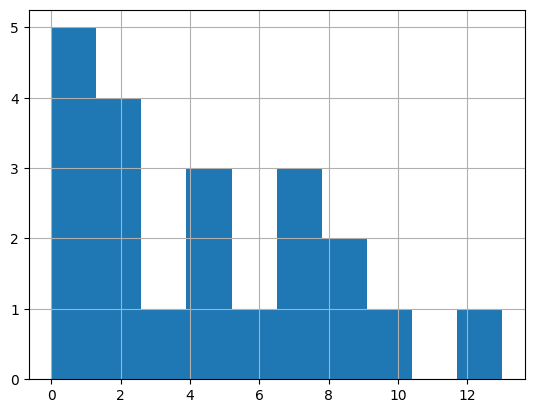

In [78]:
pivot_centr.Tekay.hist()

<AxesSubplot: >

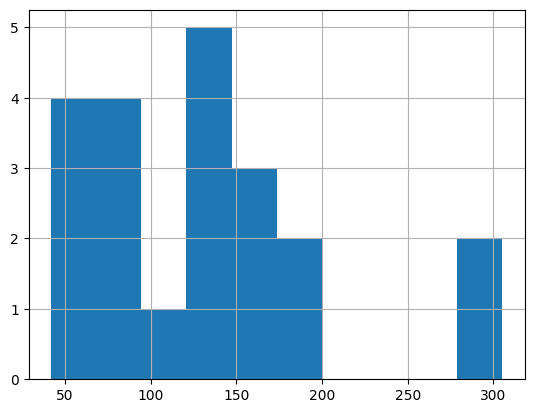

In [79]:
pivot_centr.CRM.hist()

<AxesSubplot: >

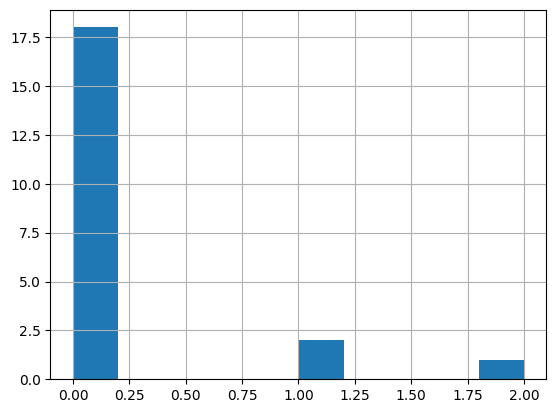

In [81]:
pivot_centr.Reina.hist()

<AxesSubplot: >

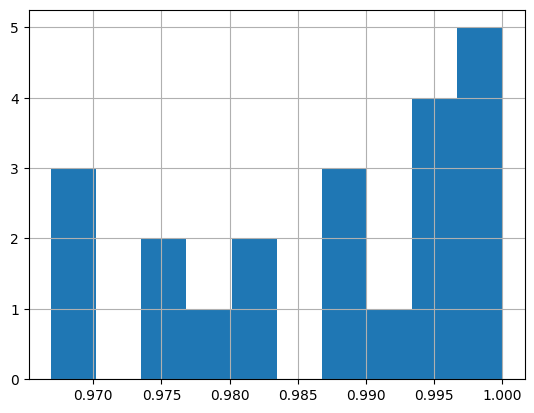

In [86]:
((pivot_centr.Athila + pivot_centr.CRM + pivot_centr.Retand) / (pivot_centr.sum_Ty3 - pivot_centr.Gypsy_LTR_retrotransposon)).hist()

<AxesSubplot: >

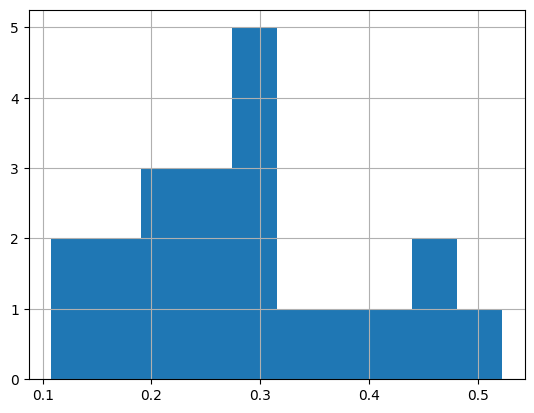

In [87]:
((pivot_centr.CRM) / (pivot_centr.sum_Ty3 - pivot_centr.Gypsy_LTR_retrotransposon)).hist()

<AxesSubplot: >

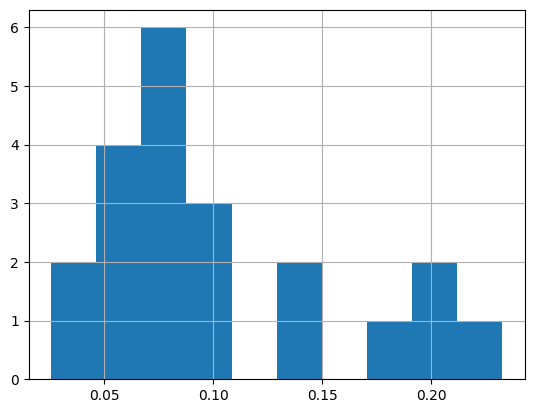

In [88]:
((pivot_centr.Retand) / (pivot_centr.sum_Ty3 - pivot_centr.Gypsy_LTR_retrotransposon)).hist()

In [89]:
((pivot_centr.CRM) / (pivot_centr.sum_Ty3 - pivot_centr.Gypsy_LTR_retrotransposon))

Ceb_d_centr    0.209738
al1_centr      0.310680
WS1_centr      0.301848
TE11_centr     0.304132
TE4_centr      0.256289
TE8_centr      0.226510
PU6_centr      0.252700
NT9_centr      0.279851
NT8_centr      0.107784
NT12_centr     0.295707
MN47_centr     0.480064
TSS_centr      0.522260
LPT_centr      0.465517
PTP_centr      0.420382
Ped_centr      0.171429
Ceb_c_centr    0.196217
BOR_centr      0.242165
BAM12_centr    0.337500
AL27_centr     0.164794
AL08_centr     0.370079
NT1_centr      0.148829
dtype: float64

In [90]:
((pivot_centr.Retand) / (pivot_centr.sum_Ty3 - pivot_centr.Gypsy_LTR_retrotransposon))

Ceb_d_centr    0.176030
al1_centr      0.194175
WS1_centr      0.141684
TE11_centr     0.094215
TE4_centr      0.084906
TE8_centr      0.080537
PU6_centr      0.086393
NT9_centr      0.082090
NT8_centr      0.059880
NT12_centr     0.084261
MN47_centr     0.025518
TSS_centr      0.037671
LPT_centr      0.091954
PTP_centr      0.098726
Ped_centr      0.232653
Ceb_c_centr    0.196217
BOR_centr      0.051282
BAM12_centr    0.137500
AL27_centr     0.071161
AL08_centr     0.059055
NT1_centr      0.051839
dtype: float64

In [88]:
pivot_nocentr = pivo.iloc[[2,3,6,7,10,11,14,15,18,19,23,22,27,26,29,32,33,36,37,40,41],:]
pivot_nocentr 

,TE,Ceb_d_centr,al1_centr,al1_nocentr,WS1_nocentr,WS1_centr,TE11_centr,TE11_nocentr,TE4_nocentr,TE4_centr,...,BAM12_nocentr,BAM12_centr,AL27_centr,AL27_nocentr,AL08_nocentr,AL08_centr,NT1_centr,NT1_nocentr,Ceb_d_nocentr,LTR_class
2,Mutator_TIR_transposon,87.0,23.0,21136.0,20459.0,35.0,26.0,21152.0,21135.0,63.0,...,20414.0,56.0,60.0,17619.0,19126.0,96.0,98.0,17637.0,19991.0,
3,Gypsy_LTR_retrotransposon,794.0,1199.0,11228.0,10098.0,1297.0,1815.0,10372.0,10379.0,1983.0,...,10091.0,1163.0,845.0,7726.0,7189.0,680.0,2311.0,11905.0,19249.0,
6,target_site_duplication,690.0,432.0,4578.0,4182.0,518.0,623.0,3956.0,3912.0,657.0,...,3774.0,416.0,457.0,2406.0,2395.0,379.0,949.0,2413.0,5471.0,
7,LTR_retrotransposon,1705.0,409.0,5024.0,4651.0,522.0,360.0,3877.0,3739.0,463.0,...,3240.0,176.0,803.0,2678.0,2331.0,616.0,991.0,3702.0,4378.0,
10,CACTA_TIR_transposon,54.0,55.0,3971.0,3771.0,39.0,33.0,3593.0,3360.0,131.0,...,3693.0,47.0,69.0,2269.0,2665.0,40.0,16.0,2798.0,2750.0,
11,hAT_TIR_transposon,3.0,1.0,1988.0,2128.0,0.0,4.0,1806.0,1911.0,4.0,...,1494.0,2.0,2.0,1342.0,1596.0,1.0,0.0,1040.0,1678.0,
14,LINE_element,1.0,0.0,128.0,233.0,0.0,0.0,87.0,279.0,0.0,...,286.0,0.0,0.0,245.0,195.0,0.0,0.0,209.0,232.0,
15,LINE,24.0,2.0,2666.0,2539.0,1.0,3.0,2414.0,2413.0,5.0,...,2553.0,3.0,1.0,1826.0,1817.0,3.0,2.0,2143.0,2517.0,
18,Bianca,2.0,0.0,543.0,487.0,0.0,0.0,538.0,532.0,0.0,...,532.0,1.0,0.0,429.0,341.0,0.0,0.0,527.0,1512.0,Copia
19,Athila,156.0,197.0,460.0,479.0,269.0,362.0,466.0,448.0,417.0,...,459.0,203.0,197.0,352.0,320.0,139.0,474.0,485.0,1423.0,Gypsy


In [96]:
pivot_nocentr["sum_LTR"] = pivot_nocentr.Gypsy_LTR_retrotransposon + pivot_nocentr.Copia_LTR_retrotransposon + pivot_nocentr.LTR_retrotransposon + pivot_nocentr.Retand + pivot_nocentr.Ale + pivot_nocentr.Bianca + pivot_nocentr.Athila + pivot_nocentr.Ivana + pivot_nocentr.Tekay  + pivot_nocentr.Tork + pivot_nocentr.CRM + pivot_nocentr.Ikeros + pivot_nocentr.Reina + pivot_nocentr.Angela  + pivot_nocentr.Alesia  + pivot_nocentr['Ty1-outgroup'] + pivot_nocentr['Gymco-II'] + pivot_nocentr.Chlamyvir + pivot_nocentr["chromo-outgroup"] + pivot_nocentr.TatIII  + pivot_nocentr["chromo-unclass"]  + pivot_nocentr.Galadriel + pivot_nocentr["Gymco-III"]  + pivot_nocentr.Lyco  + pivot_nocentr.Tcn1  + pivot_nocentr.Ogre + pivot_nocentr.Phygy  + pivot_nocentr["non-chromo-outgroup"] + pivot_nocentr["Gymco-I"] + pivot_nocentr.TatI  + pivot_nocentr.Osser  + pivot_nocentr.Bryco
pivot_nocentr["sum_Ty1"] = pivot_nocentr.Copia_LTR_retrotransposon + pivot_nocentr.Ale + pivot_nocentr.Bianca + pivot_nocentr.Ivana + pivot_nocentr.Tork + pivot_nocentr.Ikeros + pivot_nocentr.Angela  + pivot_nocentr.Alesia  + pivot_nocentr['Ty1-outgroup'] + pivot_nocentr['Gymco-II'] +  pivot_nocentr["Gymco-III"]  + pivot_nocentr.Lyco + pivot_nocentr["Gymco-I"] + pivot_nocentr.Osser  + pivot_nocentr.Bryco
pivot_nocentr["sum_Ty3"] = pivot_nocentr.Gypsy_LTR_retrotransposon + pivot_nocentr.Retand + pivot_nocentr.Athila + pivot_nocentr.Tekay + pivot_nocentr.CRM + pivot_nocentr.Reina + pivot_nocentr.Chlamyvir + pivot_nocentr["chromo-outgroup"] + pivot_nocentr.TatIII  + pivot_nocentr["chromo-unclass"]  + pivot_nocentr.Galadriel  + pivot_nocentr.Tcn1  + pivot_nocentr.Ogre + pivot_nocentr.Phygy  + pivot_nocentr["non-chromo-outgroup"] + pivot_nocentr.TatI


/tmp/ipykernel_93274/1626348899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_nocentr["sum_LTR"] = pivot_nocentr.Gypsy_LTR_retrotransposon + pivot_nocentr.Copia_LTR_retrotransposon + pivot_nocentr.LTR_retrotransposon + pivot_nocentr.Retand + pivot_nocentr.Ale + pivot_nocentr.Bianca + pivot_nocentr.Athila + pivot_nocentr.Ivana + pivot_nocentr.Tekay  + pivot_nocentr.Tork + pivot_nocentr.CRM + pivot_nocentr.Ikeros + pivot_nocentr.Reina + pivot_nocentr.Angela  + pivot_nocentr.Alesia  + pivot_nocentr['Ty1-outgroup'] + pivot_nocentr['Gymco-II'] + pivot_nocentr.Chlamyvir + pivot_nocentr["chromo-outgroup"] + pivot_nocentr.TatIII  + pivot_nocentr["chromo-unclass"]  + pivot_nocentr.Galadriel + pivot_nocentr["Gymco-III"]  + pivot_nocentr.Lyco  +

array([[<AxesSubplot: title={'center': 'sum_Ty1'}>,
        <AxesSubplot: title={'center': 'sum_Ty3'}>]], dtype=object)

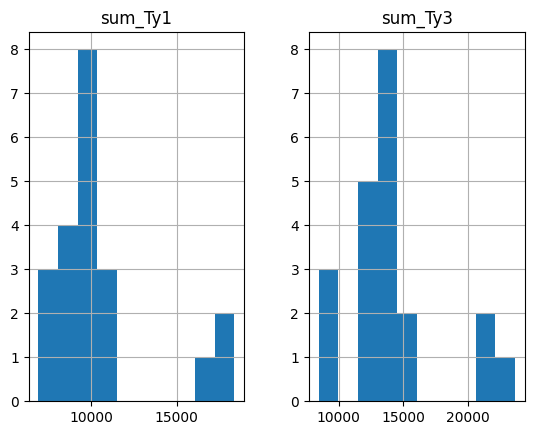

In [97]:
pivot_nocentr.loc[:,["sum_Ty1", "sum_Ty3"]].hist()

<AxesSubplot: >

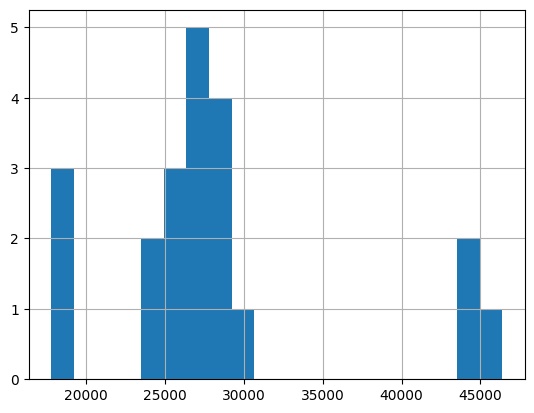

In [98]:
pivot_nocentr.sum_LTR.hist(bins=20)

In [99]:
pivot_nocentr[pivot_nocentr.sum_LTR > 40000]

TE,helitron,repeat_region,Mutator_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,long_terminal_repeat,target_site_duplication,LTR_retrotransposon,PIF_Harbinger_TIR_transposon,L1_LINE_retrotransposon,...,Sola2,Osser,Sola1,TatI,Penelope,Bryco,summa,sum_LTR,sum_Ty1,sum_Ty3
Ped_nocentr,73946.0,25434.0,18811.0,17666.0,12595.0,5403.0,5407.0,5603.0,3276.0,3910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,190435.0,44243.0,17015.0,21625.0
Ceb_c_nocentr,76488.0,25294.0,85763.0,18114.0,13031.0,5649.0,5653.0,4362.0,3339.0,4047.0,...,0.0,0.0,0.0,0.0,0.0,0.0,261006.0,44140.0,17745.0,22033.0
Ceb_d_nocentr,77983.0,26558.0,19991.0,19249.0,13816.0,5474.0,5471.0,4378.0,4071.0,4028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,200440.0,46367.0,18357.0,23632.0


In [102]:
pivot_nocentr[pivot_nocentr.sum_Ty3 > 20000]

TE,helitron,repeat_region,Mutator_TIR_transposon,Gypsy_LTR_retrotransposon,Copia_LTR_retrotransposon,long_terminal_repeat,target_site_duplication,LTR_retrotransposon,PIF_Harbinger_TIR_transposon,L1_LINE_retrotransposon,...,Sola2,Osser,Sola1,TatI,Penelope,Bryco,summa,sum_LTR,sum_Ty1,sum_Ty3
Ped_nocentr,73946.0,25434.0,18811.0,17666.0,12595.0,5403.0,5407.0,5603.0,3276.0,3910.0,...,0.0,0.0,0.0,0.0,0.0,0.0,190435.0,44243.0,17015.0,21625.0
Ceb_c_nocentr,76488.0,25294.0,85763.0,18114.0,13031.0,5649.0,5653.0,4362.0,3339.0,4047.0,...,0.0,0.0,0.0,0.0,0.0,0.0,261006.0,44140.0,17745.0,22033.0
Ceb_d_nocentr,77983.0,26558.0,19991.0,19249.0,13816.0,5474.0,5471.0,4378.0,4071.0,4028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,200440.0,46367.0,18357.0,23632.0


<AxesSubplot: >

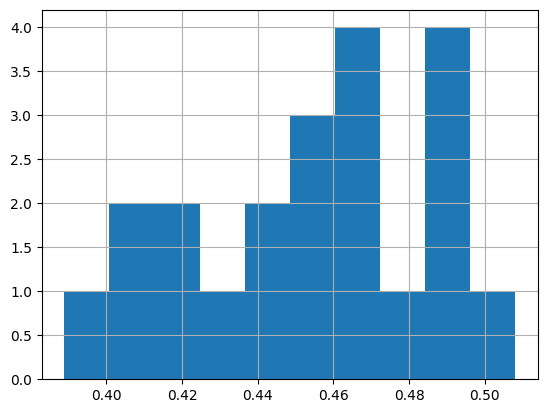

In [103]:
(pivot_nocentr.Ale / (pivot_nocentr.sum_Ty1 - pivot_nocentr.Copia_LTR_retrotransposon)).hist()

<AxesSubplot: >

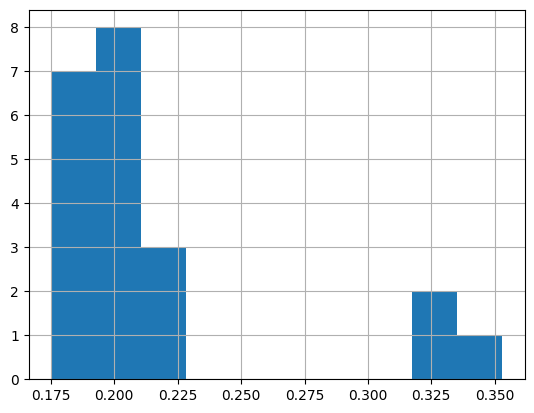

In [104]:
(pivot_nocentr.Athila / (pivot_nocentr.sum_Ty3 - pivot_nocentr.Gypsy_LTR_retrotransposon)).hist()

In [105]:
(pivot_nocentr.Athila / (pivot_nocentr.sum_Ty3 - pivot_nocentr.Gypsy_LTR_retrotransposon))

al1_nocentr      0.182975
WS1_nocentr      0.209536
TE11_nocentr     0.199914
TE4_nocentr      0.200089
TE8_nocentr      0.210960
PU6_nocentr      0.207622
NT9_nocentr      0.181403
NT8_nocentr      0.178585
NT12_nocentr     0.197421
MN47_nocentr     0.198473
LPT_nocentr      0.187723
TSS_nocentr      0.192215
Ped_nocentr      0.325335
PTP_nocentr      0.175099
Ceb_c_nocentr    0.352896
BOR_nocentr      0.218158
BAM12_nocentr    0.203728
AL27_nocentr     0.226804
AL08_nocentr     0.194411
NT1_nocentr      0.184692
Ceb_d_nocentr    0.324663
dtype: float64

In [106]:
(pivot_centr.Ale / (pivot_centr.sum_Ty1 - pivot_centr.Copia_LTR_retrotransposon))

Ceb_d_centr    0.987382
al1_centr      1.000000
WS1_centr      0.992188
TE11_centr     1.000000
TE4_centr      0.993464
TE8_centr      0.977612
PU6_centr      1.000000
NT9_centr      1.000000
NT8_centr      0.993377
NT12_centr     0.971751
MN47_centr     1.000000
TSS_centr      1.000000
LPT_centr      1.000000
PTP_centr      1.000000
Ped_centr      0.987198
Ceb_c_centr    0.989733
BOR_centr      0.995536
BAM12_centr    0.974843
AL27_centr     1.000000
AL08_centr     1.000000
NT1_centr      1.000000
dtype: float64

<AxesSubplot: >

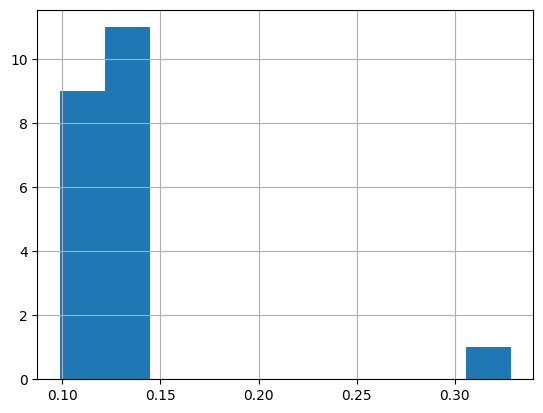

In [116]:
(pivot_nocentr.Mutator_TIR_transposon / pivot_nocentr.summa).hist()

<AxesSubplot: >

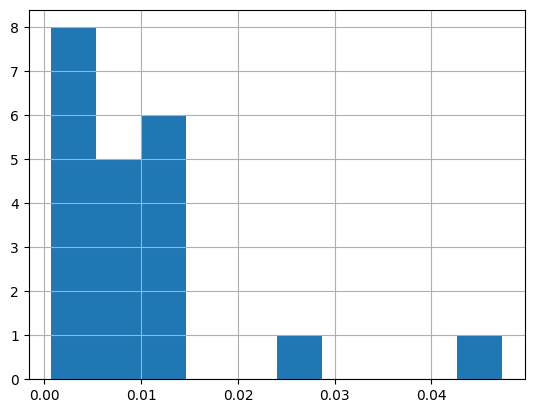

In [115]:
(pivot_centr.Mutator_TIR_transposon / pivot_centr.summa).hist()

In [109]:
(pivot_nocentr.helitron / pivot_nocentr.summa)

al1_nocentr      0.410429
WS1_nocentr      0.417348
TE11_nocentr     0.404639
TE4_nocentr      0.430330
TE8_nocentr      0.427180
PU6_nocentr      0.414938
NT9_nocentr      0.428752
NT8_nocentr      0.418381
NT12_nocentr     0.439528
MN47_nocentr     0.400367
LPT_nocentr      0.434200
TSS_nocentr      0.402855
Ped_nocentr      0.388300
PTP_nocentr      0.436360
Ceb_c_nocentr    0.293051
BOR_nocentr      0.437655
BAM12_nocentr    0.437207
AL27_nocentr     0.443775
AL08_nocentr     0.437707
NT1_nocentr      0.416674
Ceb_d_nocentr    0.389059
dtype: float64

In [110]:
(pivot_centr.helitron / pivot_centr.summa)

Ceb_d_centr    0.027320
al1_centr      0.023501
WS1_centr      0.008490
TE11_centr     0.023621
TE4_centr      0.041613
TE8_centr      0.026452
PU6_centr      0.018055
NT9_centr      0.025287
NT8_centr      0.036533
NT12_centr     0.027532
MN47_centr     0.007101
TSS_centr      0.013915
LPT_centr      0.010769
PTP_centr      0.018024
Ped_centr      0.042311
Ceb_c_centr    0.039785
BOR_centr      0.005220
BAM12_centr    0.024244
AL27_centr     0.017096
AL08_centr     0.022939
NT1_centr      0.001692
dtype: float64

In [113]:
(pivot_centr.repeat_region / pivot_centr.summa)

Ceb_d_centr    0.147917
al1_centr      0.151040
WS1_centr      0.138366
TE11_centr     0.140755
TE4_centr      0.144280
TE8_centr      0.146181
PU6_centr      0.483788
NT9_centr      0.134394
NT8_centr      0.155265
NT12_centr     0.142166
MN47_centr     0.140179
TSS_centr      0.131903
LPT_centr      0.133762
PTP_centr      0.149220
Ped_centr      0.166096
Ceb_c_centr    0.185516
BOR_centr      0.866471
BAM12_centr    0.172054
AL27_centr     0.258932
AL08_centr     0.162710
NT1_centr      0.134379
dtype: float64

In [117]:
(pivot_nocentr.Mutator_TIR_transposon / pivot_nocentr.summa)

al1_nocentr      0.119491
WS1_nocentr      0.125568
TE11_nocentr     0.123486
TE4_nocentr      0.123184
TE8_nocentr      0.122079
PU6_nocentr      0.118564
NT9_nocentr      0.117984
NT8_nocentr      0.122870
NT12_nocentr     0.121529
MN47_nocentr     0.125534
LPT_nocentr      0.117207
TSS_nocentr      0.120650
Ped_nocentr      0.098779
PTP_nocentr      0.116683
Ceb_c_nocentr    0.328586
BOR_nocentr      0.130113
BAM12_nocentr    0.122117
AL27_nocentr     0.127322
AL08_nocentr     0.139888
NT1_nocentr      0.122469
Ceb_d_nocentr    0.099736
dtype: float64

In [4]:
pivo

,Ceb_d_centr,al1_centr,al1_nocentr,WS1_nocentr,WS1_centr,TE11_centr,TE11_nocentr,TE4_nocentr,TE4_centr,TE8_centr,...,BOR_nocentr,BAM12_nocentr,BAM12_centr,AL27_centr,AL27_nocentr,AL08_nocentr,AL08_centr,NT1_centr,NT1_nocentr,Ceb_d_nocentr
TE,,,,,,,,,,,,,,,,,,,,,
helitron,280.0,96.0,72598.0,67999.0,37.0,122.0,69311.0,73833.0,259.0,133.0,...,61178.0,73087.0,93.0,89.0,61410.0,59845.0,86.0,15.0,60006.0,77983.0
repeat_region,1516.0,617.0,24269.0,21807.0,603.0,727.0,28323.0,24726.0,898.0,735.0,...,22749.0,21320.0,660.0,1348.0,21337.0,20034.0,610.0,1191.0,19781.0,26558.0
Mutator_TIR_transposon,87.0,23.0,21136.0,20459.0,35.0,26.0,21152.0,21135.0,63.0,44.0,...,18188.0,20414.0,56.0,60.0,17619.0,19126.0,96.0,98.0,17637.0,19991.0
Gypsy_LTR_retrotransposon,794.0,1199.0,11228.0,10098.0,1297.0,1815.0,10372.0,10379.0,1983.0,1661.0,...,6923.0,10091.0,1163.0,845.0,7726.0,7189.0,680.0,2311.0,11905.0,19249.0
Copia_LTR_retrotransposon,3122.0,322.0,8575.0,6820.0,276.0,218.0,7560.0,7553.0,341.0,286.0,...,5468.0,8364.0,323.0,598.0,5470.0,5917.0,427.0,1120.0,6291.0,13816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Osser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Sola1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TatI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
pivo.LTR_class[pivo.TE.isin(["Ale", "Bianca", "Ivana", "Tork", "Ikeros", "Angela", "Alesia", "Ty1-outgroup", "Gymco-II", "Gymco-III", "Lyco", "Gymco-I", "Osser", "Bryco"])] = "Copia"


/tmp/ipykernel_119249/3614111910.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
LTR_class

In [25]:
pivo.LTR_class[pivo.TE.isin(["Retand", "Athila", "Tekay", "CRM", "Reina", "Chlamyvir", "chromo-outgroup", "TatIII", "chromo-unclass", "Galadriel", "Tcn1", "Ogre", "Phygy", "non-chromo-outgroup", "TatI"])] = "Gypsy"

/tmp/ipykernel_119249/600139925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
import plotly.express as px


fig = px.bar(pivo[(pivo.LTR_class == 'Copia')].iloc[:,0:5], color="TE", title="Long-Form Input")
fig.show()

In [13]:
pivo = pivo.reset_index()

In [52]:
fig = px.bar(copia_pivo2, y=copia_pivo2.iloc[:,[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,30,31,34,35,38,39]], x='TE')
fig.show()

/home/aglushkevich/.conda/envs/ddocent_env/lib/python3.10/site-packages/plotly/express/_core.py:1270: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aglushkevich/.conda/envs/ddocent_env/lib/python3.10/site-packages/plotly/express/_core.py:1270: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/aglushkevich/.conda/envs/ddocent_env/lib/python3.10/site-packages/plotly/express/_core.py:1270: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

KeyError: 'Ped_centr'

In [16]:
pivo[(pivo.LTR_class == 'Copia')].iloc[:,0:2]

,TE,Ceb_d_centr


In [34]:
copia_pivo = pivo[(pivo.LTR_class == 'Copia')]

In [42]:
copia_pivo2.iloc[:,[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,30,31,34,35,38,39]]

,Ceb_d_centr,al1_centr,WS1_centr,TE11_centr,TE4_centr,TE8_centr,PU6_centr,NT9_centr,NT8_centr,NT12_centr,...,TSS_centr,LPT_centr,PTP_centr,Ped_centr,Ceb_c_centr,BOR_centr,BAM12_centr,AL27_centr,AL08_centr,NT1_centr
17,939.0,152.0,127.0,109.0,152.0,131.0,156.0,161.0,150.0,172.0,...,493.0,462.0,523.0,694.0,964.0,223.0,155.0,223.0,195.0,615.0
18,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0
20,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,4.0,0.0,1.0,0.0,0.0,0.0
23,4.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
29,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [60]:
copia_pivo2 = copia_pivo.iloc[:,1:-1]

In [87]:
px.bar(copia_pivo2, y=list(copia_pivo.TE), x='samp', barmode="relative")

In [55]:
fuckinglist = list(copia_pivo2.iloc[:,[0,1,4,5,8,9,12,13,16,17,20,21,24,25,28,30,31,34,35,38,39]].columns.values)

In [62]:
copia_pivo2 = copia_pivo2.transpose()

In [63]:
copia_pivo2 = copia_pivo2.reset_index()

In [64]:
copia_pivo2

,index,17,18,20,23,29,35,36,37,38,45,48,54,56,60
0,Ceb_d_centr,939.0,2.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,al1_centr,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,al1_nocentr,1252.0,543.0,347.0,236.0,120.0,20.0,32.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,WS1_nocentr,1135.0,487.0,302.0,153.0,113.0,20.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WS1_centr,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,TE11_centr,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TE11_nocentr,1118.0,538.0,347.0,171.0,164.0,17.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,TE4_nocentr,1117.0,532.0,304.0,131.0,115.0,19.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TE4_centr,152.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,TE8_centr,131.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
fuckinglist

['Ceb_d_centr',
 'al1_centr',
 'WS1_centr',
 'TE11_centr',
 'TE4_centr',
 'TE8_centr',
 'PU6_centr',
 'NT9_centr',
 'NT8_centr',
 'NT12_centr',
 'MN47_centr',
 'TSS_centr',
 'LPT_centr',
 'PTP_centr',
 'Ped_centr',
 'Ceb_c_centr',
 'BOR_centr',
 'BAM12_centr',
 'AL27_centr',
 'AL08_centr',
 'NT1_centr']

In [67]:
list(copia_pivo.TE)

['Ale',
 'Bianca',
 'Ivana',
 'Tork',
 'Ikeros',
 'Angela',
 'Alesia',
 'Ty1-outgroup',
 'Gymco-II',
 'Gymco-III',
 'Lyco',
 'Gymco-I',
 'Osser',
 'Bryco']

In [83]:
copia_pivo2.columns = list(copia_pivo.TE)

In [75]:
lite = ['samp', "Ale", "Bianca", "Ivana", "Tork", "Ikeros", "Angela", "Alesia", "Ty1-outgroup", "Gymco-II", "Gymco-III", "Lyco", "Gymco-I", "Osser", "Bryco"]


In [72]:
lite[0] = "samp"

In [78]:
copia_pivo

,TE,Ceb_d_centr,al1_centr,al1_nocentr,WS1_nocentr,WS1_centr,TE11_centr,TE11_nocentr,TE4_nocentr,TE4_centr,...,BAM12_nocentr,BAM12_centr,AL27_centr,AL27_nocentr,AL08_nocentr,AL08_centr,NT1_centr,NT1_nocentr,Ceb_d_nocentr,LTR_class
17,Ale,939.0,152.0,1252.0,1135.0,127.0,109.0,1118.0,1117.0,152.0,...,1105.0,155.0,223.0,671.0,700.0,195.0,615.0,886.0,1766.0,Copia
18,Bianca,2.0,0.0,543.0,487.0,0.0,0.0,538.0,532.0,0.0,...,532.0,1.0,0.0,429.0,341.0,0.0,0.0,527.0,1512.0,Copia
20,Ivana,3.0,0.0,347.0,302.0,0.0,0.0,347.0,304.0,0.0,...,321.0,1.0,0.0,273.0,280.0,0.0,0.0,357.0,620.0,Copia
23,Tork,4.0,0.0,236.0,153.0,0.0,0.0,171.0,131.0,1.0,...,198.0,2.0,0.0,102.0,124.0,0.0,0.0,72.0,442.0,Copia
29,Ikeros,3.0,0.0,120.0,113.0,0.0,0.0,164.0,115.0,0.0,...,97.0,0.0,0.0,65.0,83.0,0.0,0.0,25.0,176.0,Copia
35,Angela,0.0,0.0,20.0,20.0,0.0,0.0,17.0,19.0,0.0,...,27.0,0.0,0.0,11.0,12.0,0.0,0.0,3.0,11.0,Copia
36,Alesia,0.0,0.0,32.0,23.0,0.0,0.0,14.0,35.0,0.0,...,43.0,0.0,0.0,9.0,11.0,0.0,0.0,49.0,11.0,Copia
37,Ty1-outgroup,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,Copia
38,Gymco-II,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Copia
45,Gymco-III,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Copia


In [82]:
copia_pivo2.shape

(42, 15)

In [81]:
len(lite)

15

In [84]:
copia_pivo2

,samp,Ale,Bianca,Ivana,Tork,Ikeros,Angela,Alesia,Ty1-outgroup,Gymco-II,Gymco-III,Lyco,Gymco-I,Osser,Bryco
0,Ceb_d_centr,939.0,2.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,al1_centr,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,al1_nocentr,1252.0,543.0,347.0,236.0,120.0,20.0,32.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
3,WS1_nocentr,1135.0,487.0,302.0,153.0,113.0,20.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,WS1_centr,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,TE11_centr,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,TE11_nocentr,1118.0,538.0,347.0,171.0,164.0,17.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,TE4_nocentr,1117.0,532.0,304.0,131.0,115.0,19.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,TE4_centr,152.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,TE8_centr,131.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
